In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from datetime import timedelta, date

In [2]:
df= pd.read_csv('Reliance Dataset.csv')
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


### VWAP

The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.

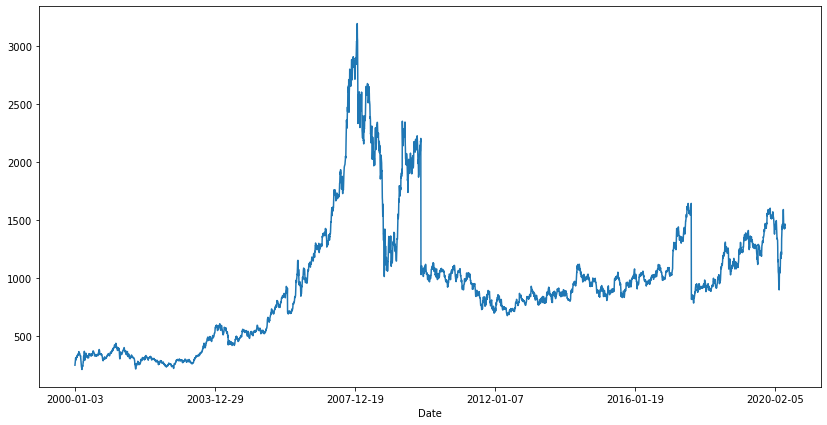

In [3]:
df.VWAP.plot(figsize=(14, 7))

In [4]:
# Feature Dealing
df.reset_index(drop=True, inplace=True)
lag_features = ["Open", "High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,...,4.840855e+14,1.439913e+14,1.761526e+14,2.178396e+14,121852.492188,121587.046875,119218.125,30350.458984,36766.332031,43829.3125
2000-01-04,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,...,1.111319e+14,1.439913e+14,1.761526e+14,2.178396e+14,121852.492188,121587.046875,119218.125,30350.458984,36766.332031,43829.3125
2000-01-05,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,...,1.805771e+14,9.821026e+13,9.821026e+13,9.821026e+13,121852.492188,121587.046875,119218.125,30350.458984,36766.332031,43829.3125
2000-01-06,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,...,3.661746e+14,3.288799e+14,3.288799e+14,3.288799e+14,121852.492188,121587.046875,119218.125,30350.458984,36766.332031,43829.3125
2000-01-07,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,...,3.904623e+14,2.443038e+14,2.728875e+14,2.728875e+14,121852.492188,121587.046875,119218.125,30350.458984,36766.332031,43829.3125


In [5]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek

In [6]:
# Filling missing values of 'Trades'
df['Trades'] = df['Trades'].fillna(df.groupby('day')['Trades'].transform('mean'))
df['Trades']

Date
2000-01-03    122079.709213
2000-01-04    122079.709213
2000-01-05    122079.709213
2000-01-06    122079.709213
2000-01-07    122079.709213
                  ...      
2020-05-22    388907.000000
2020-05-26    341795.000000
2020-05-27    348477.000000
2020-05-28    405603.000000
2020-05-29    300018.000000
Name: Trades, Length: 5075, dtype: float64

# Splitting the data into train and validation along with features.

train: Data from 26th May, 2008 to 31st December, 2018.

valid: Data from 1st January, 2019 to 31st December, 2019.

In [7]:
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

In [8]:
exogenous_features = ["Open_mean_lag3", "Open_std_lag3", "Open_mean_lag7", "Open_std_lag7", "Open_mean_lag30", "Open_std_lag30",
                      "High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

# Training and Forecasting

In [9]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], 
                   trace=True, error_action="ignore", suppress_warnings=True)
results= model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=46715.077, BIC=47012.305, Time=12.618 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=47465.352, BIC=47736.734, Time=7.262 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=46792.706, BIC=47070.549, Time=7.459 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=46813.095, BIC=47090.938, Time=11.364 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=82749.708, BIC=83014.629, Time=7.041 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=46729.081, BIC=47019.848, Time=12.243 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=46728.079, BIC=47018.845, Time=12.229 seconds
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=47667.649, BIC=47971.338, Time=12.882 seconds


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Fit ARIMA(2,0,3)x(0,0,0,0) [intercept=True]; AIC=46701.763, BIC=47005.452, Time=12.806 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=46700.542, BIC=46997.770, Time=12.473 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=46701.660, BIC=46992.427, Time=12.225 seconds
Fit ARIMA(1,0,4)x(0,0,0,0) [intercept=True]; AIC=46701.832, BIC=47005.521, Time=13.878 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=46733.996, BIC=47018.300, Time=11.951 seconds
Fit ARIMA(0,0,4)x(0,0,0,0) [intercept=True]; AIC=46704.140, BIC=47001.367, Time=13.512 seconds
Fit ARIMA(2,0,4)x(0,0,0,0) [intercept=True]; AIC=46702.847, BIC=47012.997, Time=14.100 seconds
Total fit time: 174.072 seconds


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


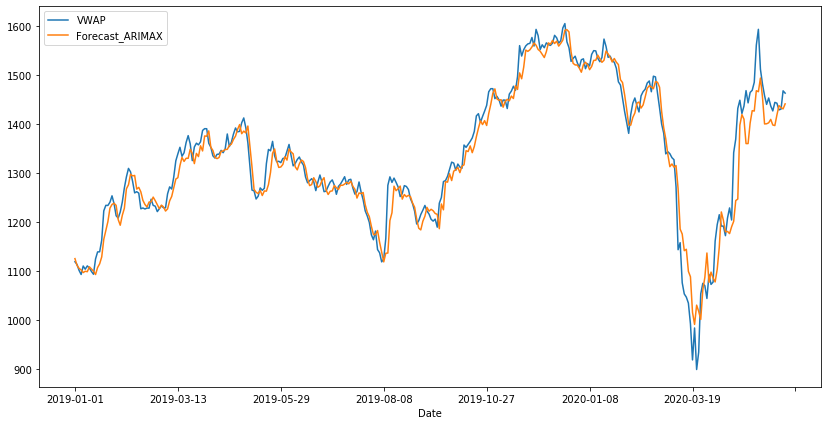

In [10]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [11]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 35.35717643310448

MAE of Auto ARIMAX: 23.85492279341704


In [12]:
df1= pd.DataFrame(df,columns= [ "Open", "High", "Low", "Volume", "Turnover", "Trades"])
df1.corr()

,Open,High,Low,Volume,Turnover,Trades
Open,1.000000,0.999435,0.999271,-0.010542,0.450704,0.111213
High,0.999435,1.000000,0.998974,-0.003257,0.456779,0.116191
Low,0.999271,0.998974,1.000000,-0.015701,0.445870,0.108090
Volume,-0.010542,-0.003257,-0.015701,1.000000,0.816291,0.735846
Turnover,0.450704,0.456779,0.445870,0.816291,1.000000,0.782811
Trades,0.111213,0.116191,0.108090,0.735846,0.782811,1.000000


# Predicting Features for Future

[ "Open", "High", "Low", "Volume", "Turnover", "Trades"]

In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize= (20, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
# To check stationarity using Missing Averages
def check_miss_avg(ts_log_feature):
    moving_avg = ts_log_feature.rolling(20).mean()
    ts_log_moving_avg_diff = ts_log_feature - moving_avg
    print(ts_log_moving_avg_diff.head(20))
    ts_log_moving_avg_diff.dropna(inplace=True)
    return (test_stationarity(ts_log_moving_avg_diff))
    

In [14]:
# first define data with needed variables and ts

def pred_lag_fea (ts):
    ts_log= np.log(ts)
    test_stationarity (ts_log)
    
    check_miss_avg (ts_log)
    

    moving_avg = ts_log.rolling(20).mean()
    ts_log_moving_avg_diff = ts_log - moving_avg
    print(ts_log_moving_avg_diff.head(20))
    ts_log_moving_avg_diff.dropna(inplace=True)


    # ARIMA
    model = ARIMA(ts_log, order=(2, 1, 2))  
    results_ARIMA = model.fit(disp=-1) 
    plt.figure(figsize=(15, 10))
    plt.plot(ts_log_moving_avg_diff)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_moving_avg_diff)**2))
    
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    print (predictions_ARIMA_diff.head())
    
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    print( predictions_ARIMA_diff_cumsum.head())


    predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA_log.head()

    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    plt.plot(ts)
    plt.plot(predictions_ARIMA)
    plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

    t= results_ARIMA.forecast(steps= 100)
    t_final= np.exp(t[2])

    l= []
    for i in range (0, 22):
        l.append(t_final[i][1])
        i+=1

    fea_month_June= np.array(l)
    return(fea_month_June)

## For High

In [15]:
ts= df['High']
display(ts)

Date
2000-01-03     251.70
2000-01-04     271.85
2000-01-05     287.90
2000-01-06     300.70
2000-01-07     317.90
               ...   
2020-05-22    1458.00
2020-05-26    1449.70
2020-05-27    1454.00
2020-05-28    1479.75
2020-05-29    1472.00
Name: High, Length: 5075, dtype: float64

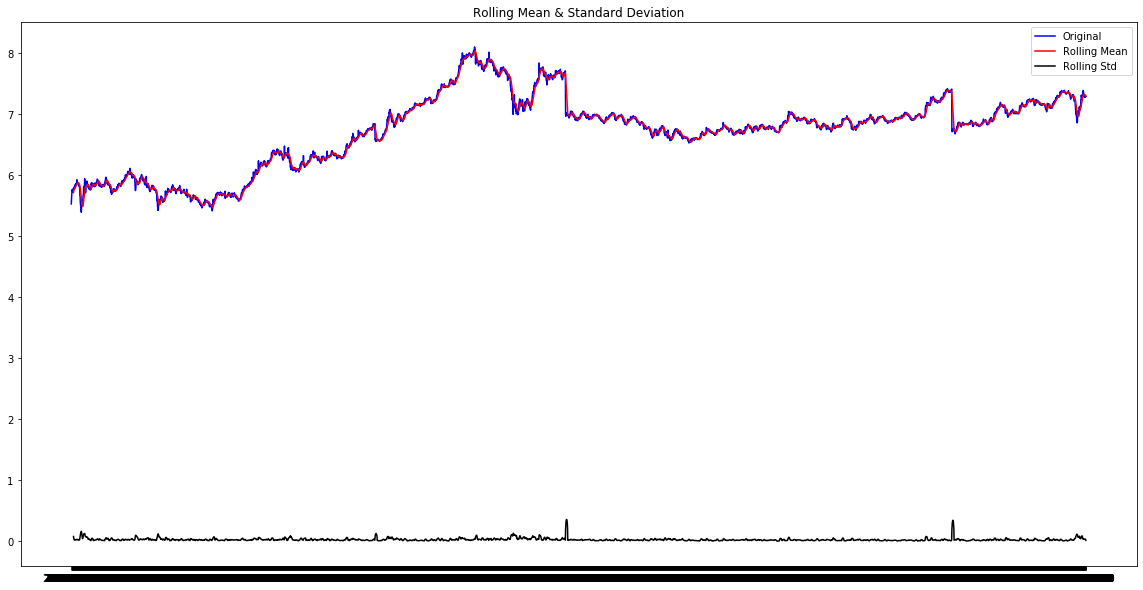

Results of Dickey-Fuller Test:
Test Statistic                   -1.855906
p-value                           0.353080
#Lags Used                        7.000000
Number of Observations Used    5067.000000
Critical Value (1%)              -3.431641
Critical Value (5%)              -2.862111
Critical Value (10%)             -2.567074
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31    0.067971
Name: High, dtype: float64


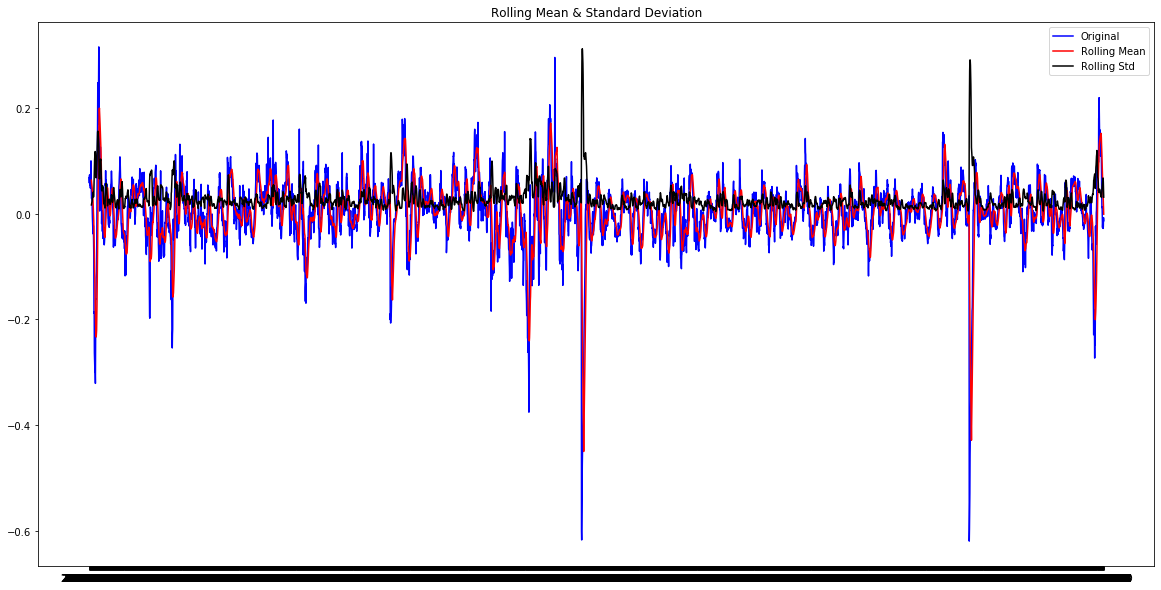

Results of Dickey-Fuller Test:
Test Statistic                -1.268987e+01
p-value                        1.138297e-23
#Lags Used                     1.900000e+01
Number of Observations Used    5.036000e+03
Critical Value (1%)           -3.431649e+00
Critical Value (5%)           -2.862114e+00
Critical Value (10%)          -2.567076e+00
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31    0.067971
Name: High, dtype: float64


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2000-01-04    0.000335
2000-01-05   -0.001406
2000-01-06   -0.000500
2000-01-07   -0.000900
2000-01-10   -0.001191
dtype: float64
Date
2000-01-04    0.000335
2000-01-05   -0.001071
2000-01-06   -0.001571
2000-01-07   -0.002471
2000-01-10   -0.003662
dtype: float64


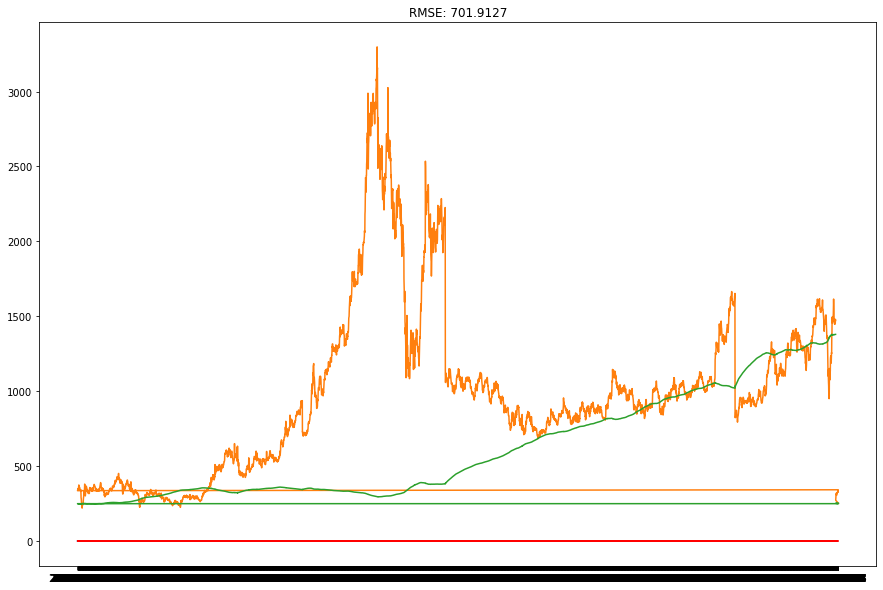

In [16]:
high_june= pred_lag_fea (ts)

In [17]:
high_june 

array([1550.73236189, 1583.05532307, 1609.0833265 , 1630.95608369,
       1650.57942151, 1668.38900973, 1684.91886991, 1700.38157315,
       1714.99298304, 1728.8771492 , 1742.14461172, 1754.87325956,
       1767.12928109, 1778.96447514, 1790.42264986, 1801.54002607,
       1812.34757405, 1822.87172295, 1833.13540199, 1843.15858664,
       1852.95884892, 1862.55172913])

## For Open

In [18]:
ts= df['Open']
display(ts)

Date
2000-01-03     237.50
2000-01-04     258.40
2000-01-05     256.65
2000-01-06     289.00
2000-01-07     295.00
               ...   
2020-05-22    1451.80
2020-05-26    1448.15
2020-05-27    1431.00
2020-05-28    1455.00
2020-05-29    1468.00
Name: Open, Length: 5075, dtype: float64

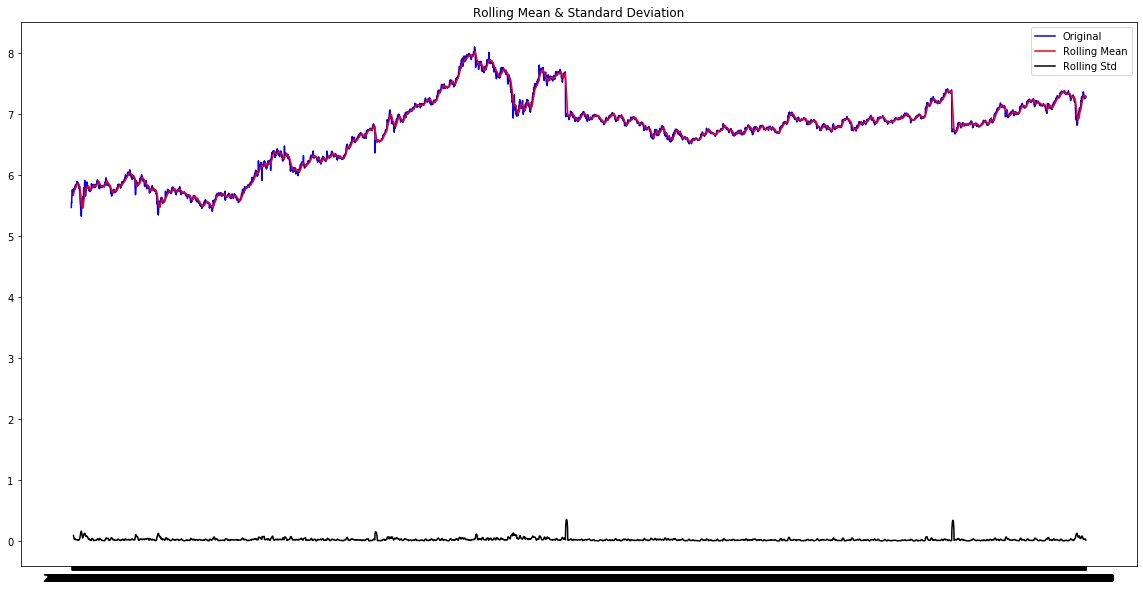

Results of Dickey-Fuller Test:
Test Statistic                   -2.066580
p-value                           0.258164
#Lags Used                        2.000000
Number of Observations Used    5072.000000
Critical Value (1%)              -3.431640
Critical Value (5%)              -2.862110
Critical Value (10%)             -2.567073
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31    0.096363
Name: Open, dtype: float64


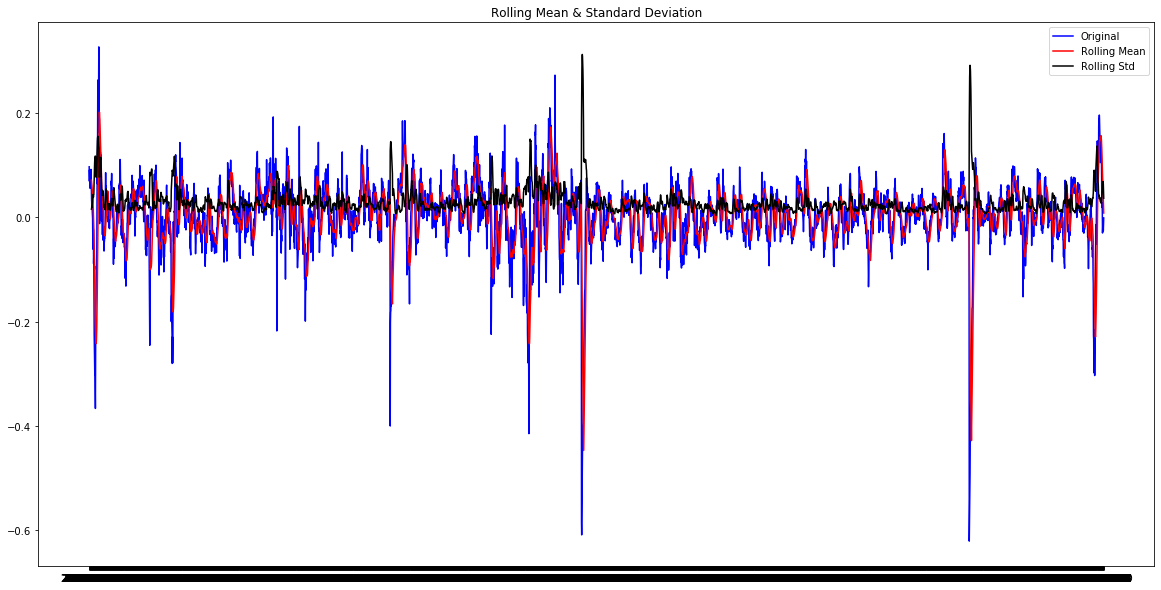

Results of Dickey-Fuller Test:
Test Statistic                -1.278641e+01
p-value                        7.230880e-24
#Lags Used                     1.900000e+01
Number of Observations Used    5.036000e+03
Critical Value (1%)           -3.431649e+00
Critical Value (5%)           -2.862114e+00
Critical Value (10%)          -2.567076e+00
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31    0.096363
Name: Open, dtype: float64


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2000-01-04    0.000356
2000-01-05   -0.008385
2000-01-06   -0.000456
2000-01-07   -0.013353
2000-01-10   -0.004717
dtype: float64
Date
2000-01-04    0.000356
2000-01-05   -0.008029
2000-01-06   -0.008485
2000-01-07   -0.021838
2000-01-10   -0.026554
dtype: float64


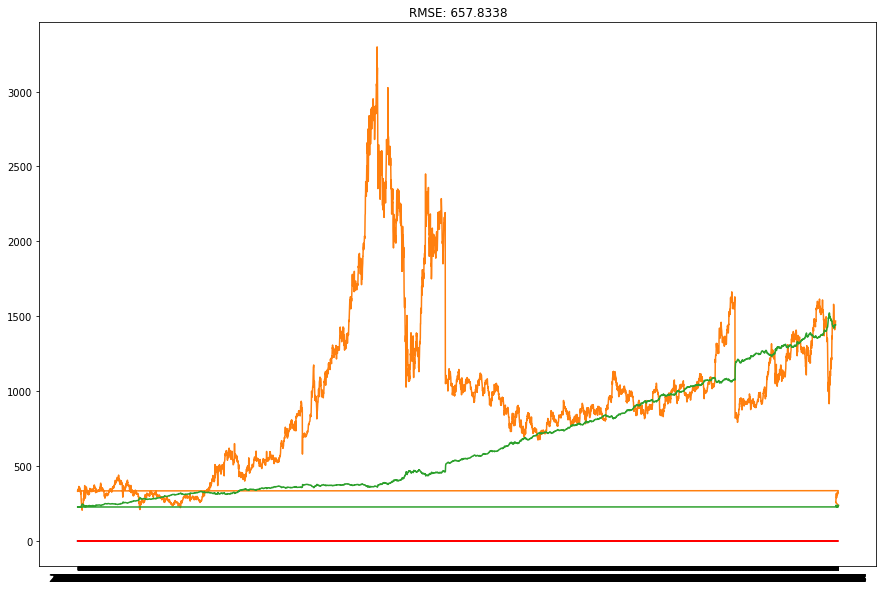

In [19]:
open_june= pred_lag_fea (ts)

In [20]:
open_june

array([1554.68655791, 1585.97980837, 1610.9096636 , 1632.19882531,
       1651.33277273, 1668.95373737, 1685.44225561, 1701.03616648,
       1715.89842666, 1730.14673583, 1743.86988479, 1757.13703576,
       1770.00343402, 1782.51409957, 1794.70632484, 1806.61142649,
       1818.25601133, 1829.66291401, 1840.85190606, 1851.84024167,
       1862.64308412, 1873.27384356])

## For Low

In [21]:
ts= df['Low']
ts

Date
2000-01-03     237.50
2000-01-04     251.30
2000-01-05     256.65
2000-01-06     289.00
2000-01-07     293.00
               ...   
2020-05-22    1426.50
2020-05-26    1416.30
2020-05-27    1412.00
2020-05-28    1449.00
2020-05-29    1452.65
Name: Low, Length: 5075, dtype: float64

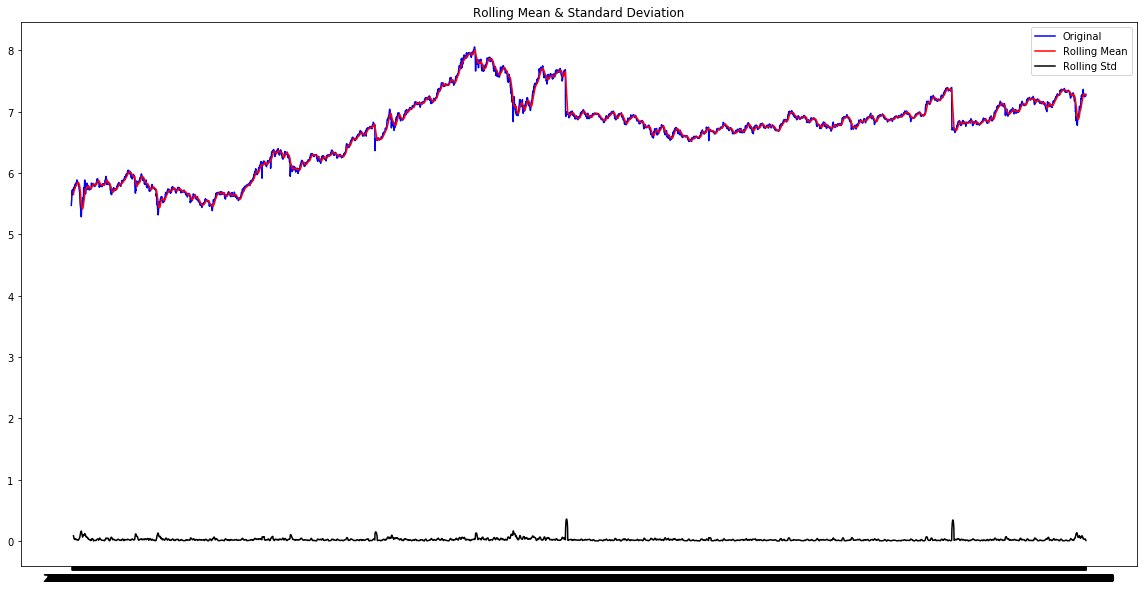

Results of Dickey-Fuller Test:
Test Statistic                   -2.076889
p-value                           0.253909
#Lags Used                        2.000000
Number of Observations Used    5072.000000
Critical Value (1%)              -3.431640
Critical Value (5%)              -2.862110
Critical Value (10%)             -2.567073
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31    0.091128
Name: Low, dtype: float64


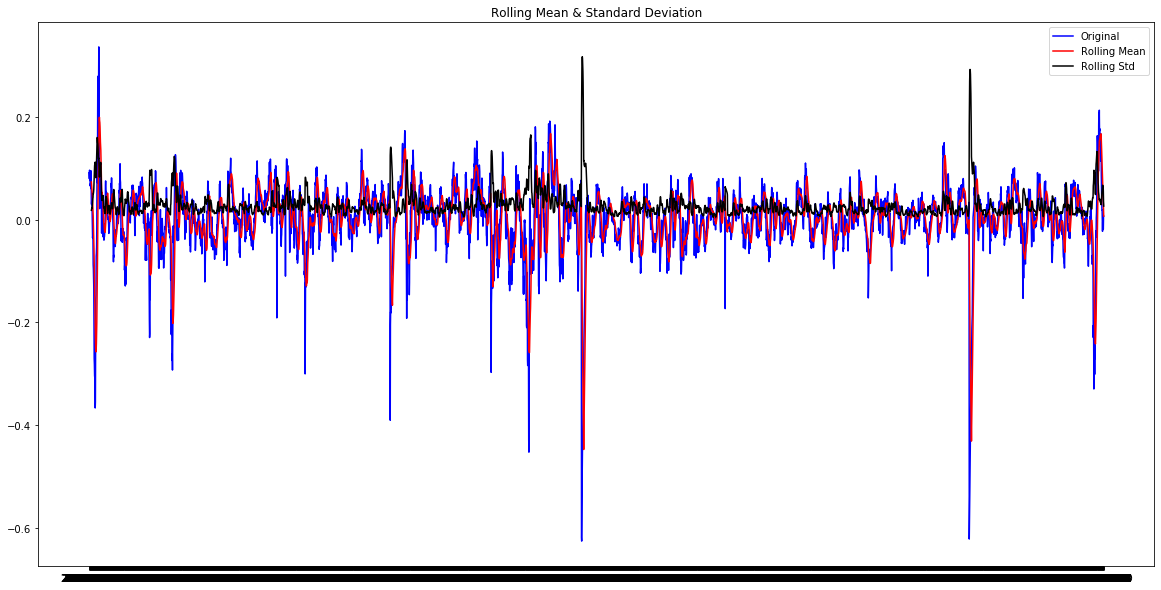

Results of Dickey-Fuller Test:
Test Statistic                -1.249771e+01
p-value                        2.851705e-23
#Lags Used                     2.400000e+01
Number of Observations Used    5.031000e+03
Critical Value (1%)           -3.431650e+00
Critical Value (5%)           -2.862115e+00
Critical Value (10%)          -2.567076e+00
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31    0.091128
Name: Low, dtype: float64


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2000-01-04    0.000356
2000-01-05    0.000815
2000-01-06   -0.000217
2000-01-07   -0.000257
2000-01-10   -0.002606
dtype: float64
Date
2000-01-04    0.000356
2000-01-05    0.001171
2000-01-06    0.000954
2000-01-07    0.000697
2000-01-10   -0.001909
dtype: float64


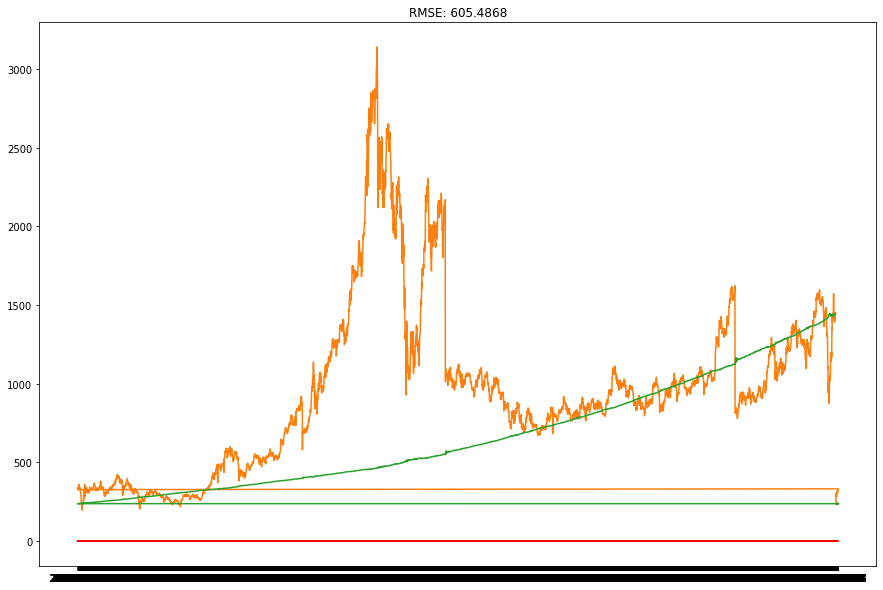

In [22]:
low_june= pred_lag_fea (ts)

In [23]:
low_june

array([1533.68412845, 1568.59921602, 1594.61524388, 1616.00078901,
       1635.13507369, 1653.38631943, 1671.22807291, 1688.50003484,
       1704.81914384, 1719.96339822, 1734.05142552, 1747.4627662 ,
       1760.60537979, 1773.70772453, 1786.75361698, 1799.56503567,
       1811.95595025, 1823.8585111 , 1835.35533564, 1846.61599068,
       1857.79287583, 1868.94573189])

## For Volume

In [24]:
ts= df['Volume']

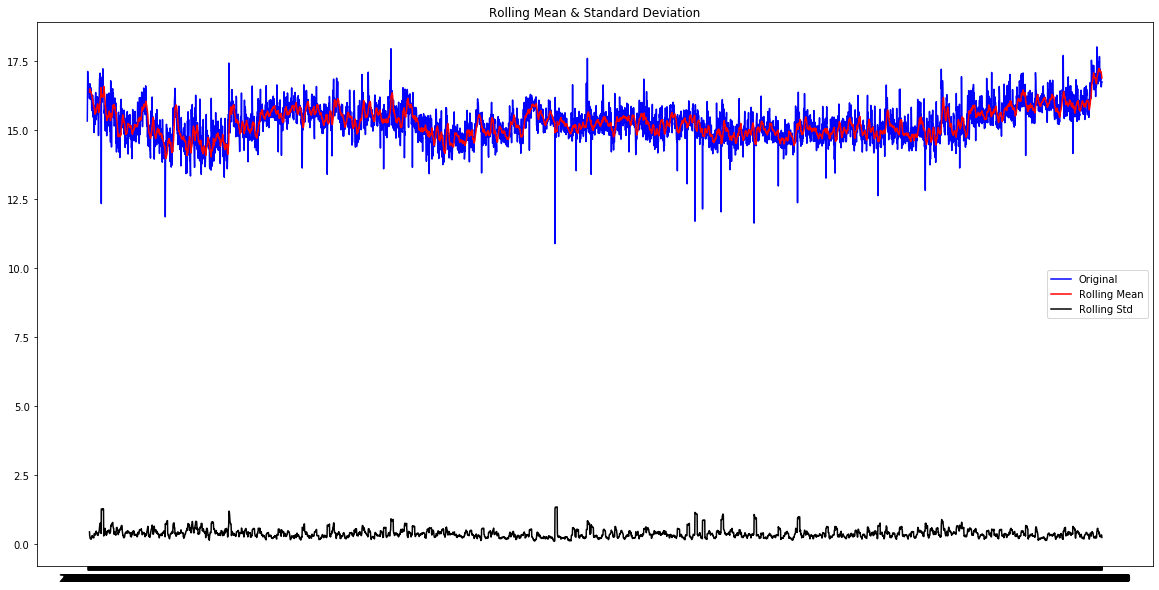

Results of Dickey-Fuller Test:
Test Statistic                   -5.288526
p-value                           0.000006
#Lags Used                       24.000000
Number of Observations Used    5050.000000
Critical Value (1%)              -3.431646
Critical Value (5%)              -2.862113
Critical Value (10%)             -2.567075
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31   -0.222621
Name: Volume, dtype: float64


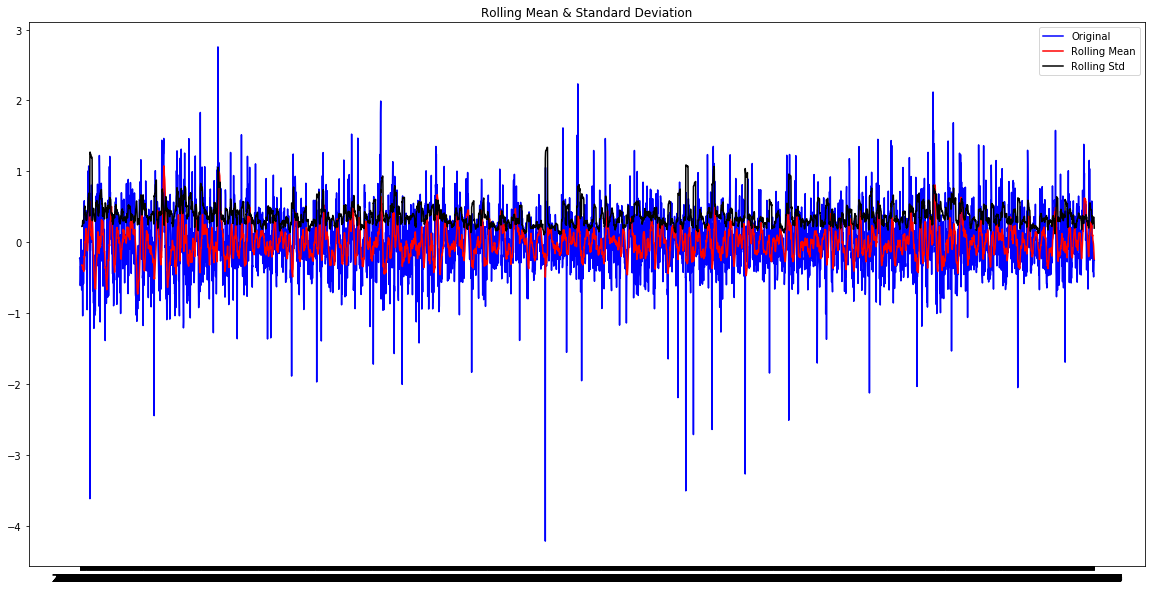

Results of Dickey-Fuller Test:
Test Statistic                -1.633429e+01
p-value                        3.039455e-29
#Lags Used                     3.000000e+01
Number of Observations Used    5.025000e+03
Critical Value (1%)           -3.431652e+00
Critical Value (5%)           -2.862115e+00
Critical Value (10%)          -2.567076e+00
dtype: float64
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31   -0.222621
Name: Volume, dtype: float64


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2000-01-04    0.000134
2000-01-05   -0.288116
2000-01-06   -0.689127
2000-01-07   -0.212289
2000-01-10   -0.295012
dtype: float64
Date
2000-01-04    0.000134
2000-01-05   -0.287982
2000-01-06   -0.977109
2000-01-07   -1.189398
2000-01-10   -1.484410
dtype: float64


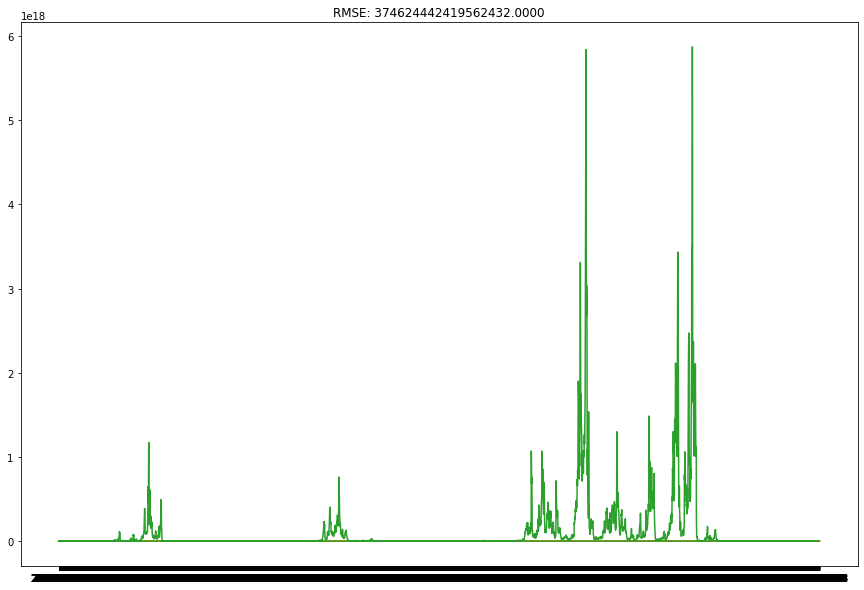

In [25]:
vol_june= pred_lag_fea (ts)

In [26]:
vol_june

array([42265975.98001174, 44489964.52143214, 45384859.02897608,
       46000505.40404727, 46489851.5457176 , 46894358.13871378,
       47234635.82875926, 47524765.43547807, 47775328.38925753,
       47994478.29976916, 48188554.12331972, 48362511.19758186,
       48520242.13247986, 48664819.49286983, 48798680.45295309,
       48923767.84618926, 49041638.27683939, 49153545.26485799,
       49260503.41100941, 49363338.09304084, 49462724.10076884,
       49559215.79097595])

## For Turnover 

In [27]:
ts= df['Turnover']

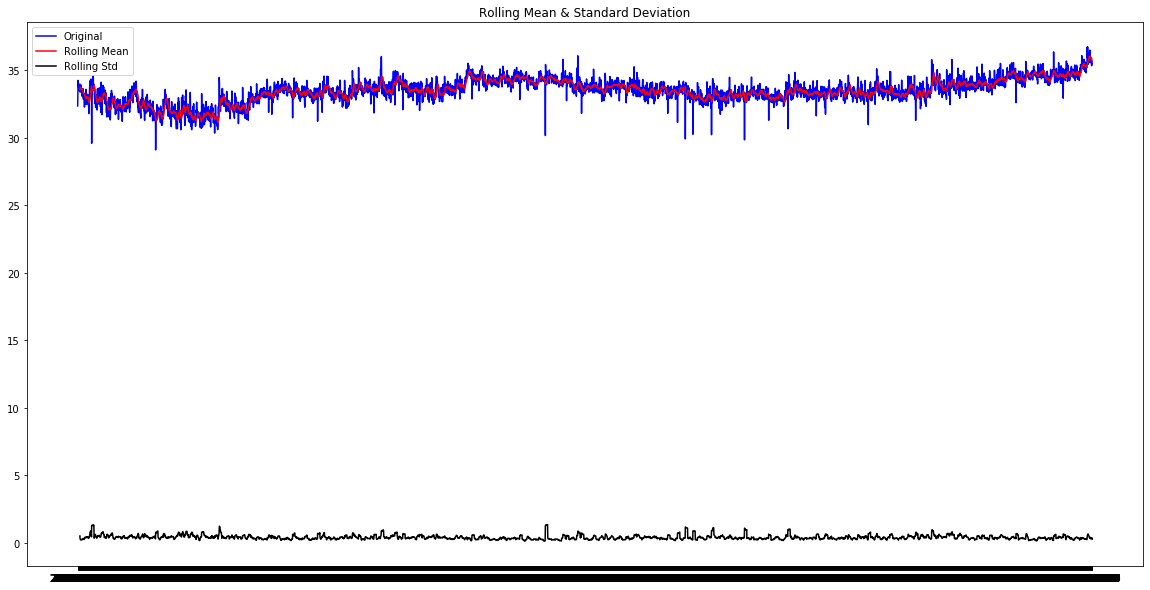

Results of Dickey-Fuller Test:
Test Statistic                   -2.160433
p-value                           0.220918
#Lags Used                       33.000000
Number of Observations Used    5041.000000
Critical Value (1%)              -3.431648
Critical Value (5%)              -2.862114
Critical Value (10%)             -2.567075
dtype: float64
Date
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
2000-01-07        NaN
2000-01-10        NaN
2000-01-11        NaN
2000-01-12        NaN
2000-01-13        NaN
2000-01-14        NaN
2000-01-17        NaN
2000-01-18        NaN
2000-01-19        NaN
2000-01-20        NaN
2000-01-21        NaN
2000-01-24        NaN
2000-01-25        NaN
2000-01-27        NaN
2000-01-28        NaN
2000-01-31   -0.14701
Name: Turnover, dtype: float64


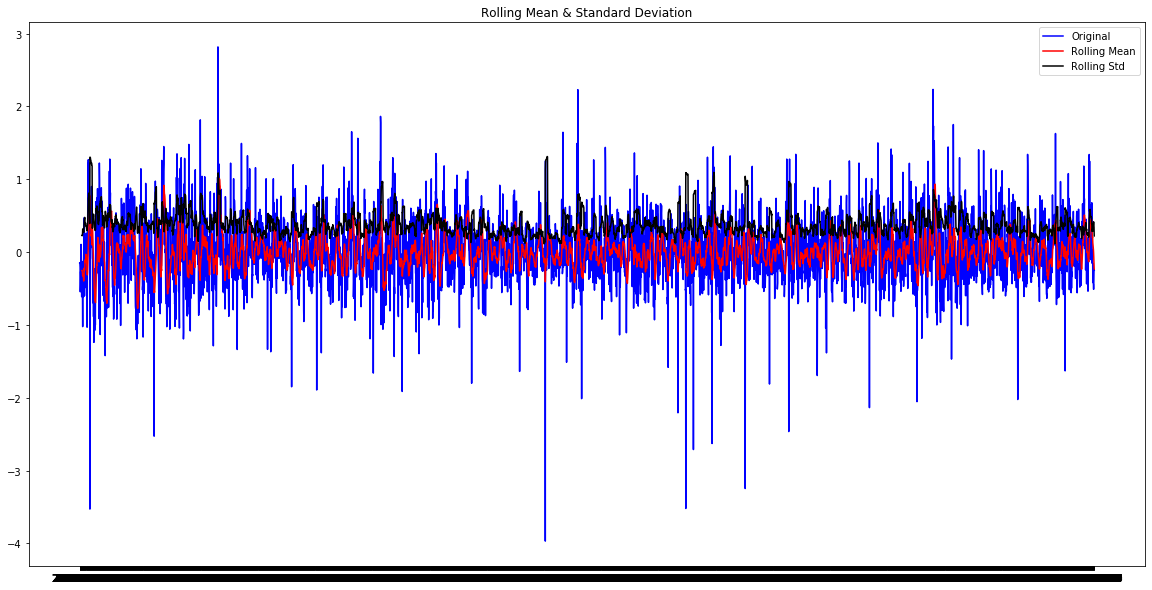

Results of Dickey-Fuller Test:
Test Statistic                -1.623792e+01
p-value                        3.753312e-29
#Lags Used                     3.000000e+01
Number of Observations Used    5.025000e+03
Critical Value (1%)           -3.431652e+00
Critical Value (5%)           -2.862115e+00
Critical Value (10%)          -2.567076e+00
dtype: float64
Date
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
2000-01-07        NaN
2000-01-10        NaN
2000-01-11        NaN
2000-01-12        NaN
2000-01-13        NaN
2000-01-14        NaN
2000-01-17        NaN
2000-01-18        NaN
2000-01-19        NaN
2000-01-20        NaN
2000-01-21        NaN
2000-01-24        NaN
2000-01-25        NaN
2000-01-27        NaN
2000-01-28        NaN
2000-01-31   -0.14701
Name: Turnover, dtype: float64


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2000-01-04    0.000438
2000-01-05   -0.307849
2000-01-06   -0.719487
2000-01-07   -0.271733
2000-01-10   -0.362928
dtype: float64
Date
2000-01-04    0.000438
2000-01-05   -0.307412
2000-01-06   -1.026899
2000-01-07   -1.298632
2000-01-10   -1.661559
dtype: float64


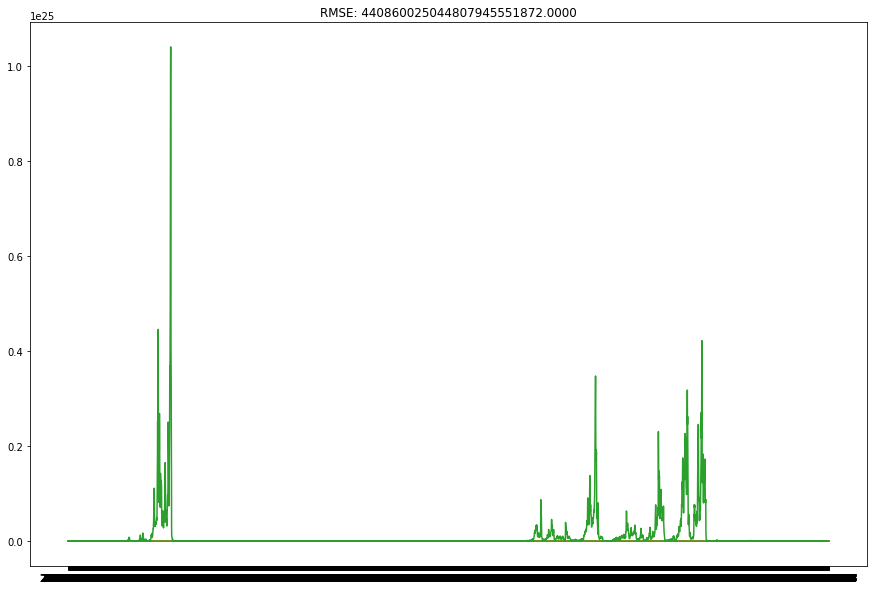

In [28]:
turn_june= pred_lag_fea (ts)

In [29]:
turn_june

array([6.19669876e+15, 6.54241006e+15, 6.69180270e+15, 6.79851589e+15,
       6.88527619e+15, 6.95843189e+15, 7.02121773e+15, 7.07586344e+15,
       7.12404991e+15, 7.16707575e+15, 7.20595403e+15, 7.24148036e+15,
       7.27428326e+15, 7.30486224e+15, 7.33361653e+15, 7.36086711e+15,
       7.38687345e+15, 7.41184648e+15, 7.43595859e+15, 7.45935135e+15,
       7.48214158e+15, 7.50442613e+15])

## For Trades 


In [30]:
ts= df['Trades']
ts.dropna(inplace=True)

In [31]:
ts

Date
2000-01-03    122079.709213
2000-01-04    122079.709213
2000-01-05    122079.709213
2000-01-06    122079.709213
2000-01-07    122079.709213
                  ...      
2020-05-22    388907.000000
2020-05-26    341795.000000
2020-05-27    348477.000000
2020-05-28    405603.000000
2020-05-29    300018.000000
Name: Trades, Length: 5075, dtype: float64

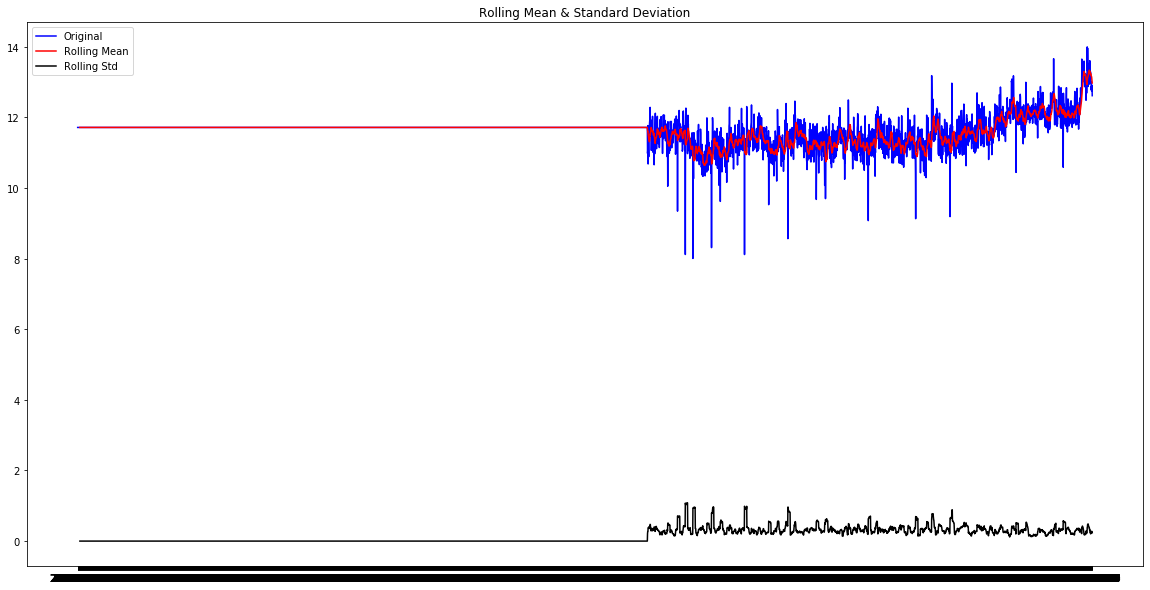

Results of Dickey-Fuller Test:
Test Statistic                   -2.217714
p-value                           0.199879
#Lags Used                       27.000000
Number of Observations Used    5047.000000
Critical Value (1%)              -3.431646
Critical Value (5%)              -2.862113
Critical Value (10%)             -2.567075
dtype: float64
Date
2000-01-03    NaN
2000-01-04    NaN
2000-01-05    NaN
2000-01-06    NaN
2000-01-07    NaN
2000-01-10    NaN
2000-01-11    NaN
2000-01-12    NaN
2000-01-13    NaN
2000-01-14    NaN
2000-01-17    NaN
2000-01-18    NaN
2000-01-19    NaN
2000-01-20    NaN
2000-01-21    NaN
2000-01-24    NaN
2000-01-25    NaN
2000-01-27    NaN
2000-01-28    NaN
2000-01-31    0.0
Name: Trades, dtype: float64


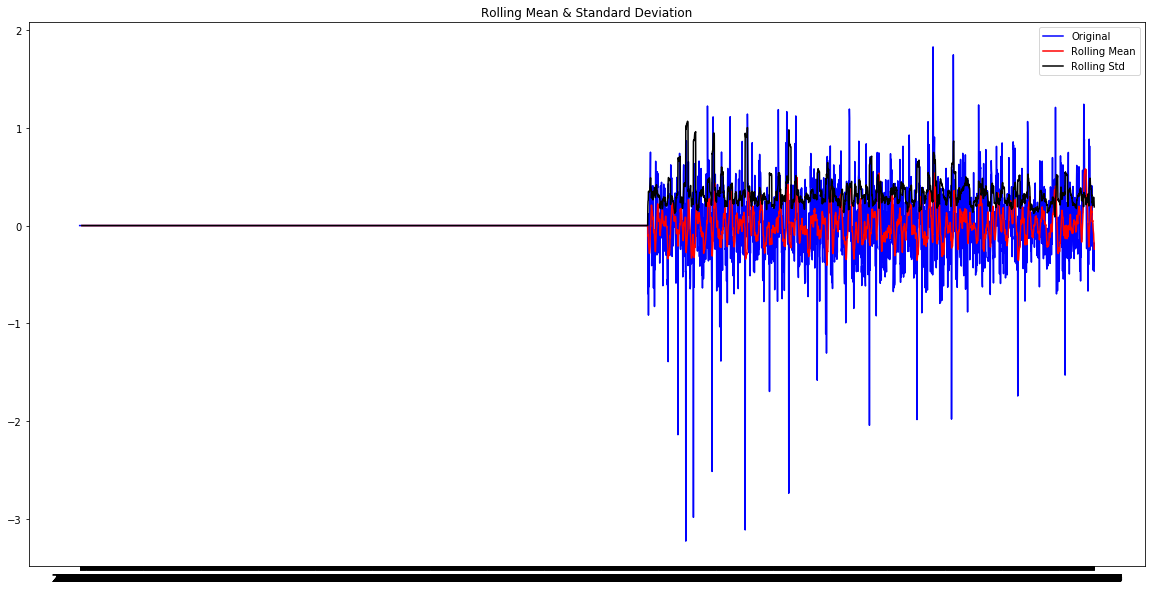

Results of Dickey-Fuller Test:
Test Statistic                  -19.446386
p-value                           0.000000
#Lags Used                       21.000000
Number of Observations Used    5034.000000
Critical Value (1%)              -3.431650
Critical Value (5%)              -2.862114
Critical Value (10%)             -2.567076
dtype: float64
Date
2000-01-03    NaN
2000-01-04    NaN
2000-01-05    NaN
2000-01-06    NaN
2000-01-07    NaN
2000-01-10    NaN
2000-01-11    NaN
2000-01-12    NaN
2000-01-13    NaN
2000-01-14    NaN
2000-01-17    NaN
2000-01-18    NaN
2000-01-19    NaN
2000-01-20    NaN
2000-01-21    NaN
2000-01-24    NaN
2000-01-25    NaN
2000-01-27    NaN
2000-01-28    NaN
2000-01-31    0.0
Name: Trades, dtype: float64


/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2000-01-04    0.000256
2000-01-05    0.000360
2000-01-06    0.000450
2000-01-07    0.000532
2000-01-10    0.000609
dtype: float64
Date
2000-01-04    0.000256
2000-01-05    0.000617
2000-01-06    0.001067
2000-01-07    0.001599
2000-01-10    0.002208
dtype: float64


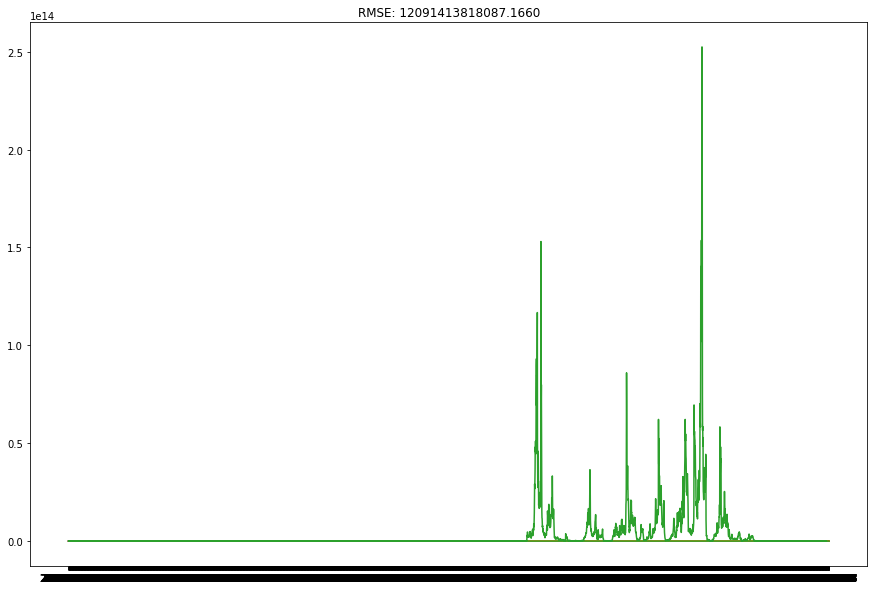

In [32]:
trade_june= pred_lag_fea(ts)

In [33]:
trade_june

array([642063.67629555, 695110.85037333, 723206.27372109, 741123.80096748,
       752946.14345995, 760941.54250154, 766512.40121357, 770540.46885008,
       773583.96361075, 775997.86039917, 778008.57387311, 779760.81125103,
       781347.18229052, 782827.00769871, 784238.30742545, 785605.45924577,
       786944.09860782, 788264.25648856, 789572.3701114 , 790872.57191054,
       792167.5160267 , 793458.90834926])

In [34]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020,6,1)
end_dt = date(2020,6,30)

weekdays = [5,6]
l=[]
for dt in daterange(start_dt, end_dt):
    if dt.weekday() not in weekdays:                    # to print only the weekdates
        l.append(dt.strftime("%Y-%m-%d"))

In [35]:
dates= np.array(l)
dates

array(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
       '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
       '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
       '2020-06-29', '2020-06-30'], dtype='<U10')

### Defining 'df' again 

In [36]:
df = pd.DataFrame({"Dates" : dates, "Open" : open_june, "High" : high_june, "Low" : low_june, "Volume" : vol_june, 
                  "Turnover" : turn_june, "Trades" : trade_june})
df.to_csv("June.csv", index=False)
# [ "Open", "High", "Low", "Volume", "Turnover", "Trades"]

In [37]:
june= pd.read_csv("June.csv")
df= june.iloc[0:18, :]
df

,Dates,Open,High,Low,Volume,Turnover,Trades
0,2020-06-01,1554.686558,1550.732362,1533.684128,4.226598e+07,6.196699e+15,642063.676296
1,2020-06-02,1585.979808,1583.055323,1568.599216,4.448996e+07,6.542410e+15,695110.850373
2,2020-06-03,1610.909664,1609.083326,1594.615244,4.538486e+07,6.691803e+15,723206.273721
3,2020-06-04,1632.198825,1630.956084,1616.000789,4.600051e+07,6.798516e+15,741123.800967
4,2020-06-05,1651.332773,1650.579422,1635.135074,4.648985e+07,6.885276e+15,752946.143460
5,2020-06-08,1668.953737,1668.389010,1653.386319,4.689436e+07,6.958432e+15,760941.542502
6,2020-06-09,1685.442256,1684.918870,1671.228073,4.723464e+07,7.021218e+15,766512.401214
7,2020-06-10,1701.036166,1700.381573,1688.500035,4.752477e+07,7.075863e+15,770540.468850
8,2020-06-11,1715.898427,1714.992983,1704.819144,4.777533e+07,7.124050e+15,773583.963611
9,2020-06-12,1730.146736,1728.877149,1719.963398,4.799448e+07,7.167076e+15,775997.860399


In [38]:
# Feature Dealing
df.reset_index(drop=True, inplace=True)
lag_features = [ "Open", "High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Dates", drop=False, inplace=True)
df.head()

/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Dates,Open,High,Low,Volume,Turnover,Trades,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Dates,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-06-01,1554.686558,1550.732362,1533.684128,4.226598e+07,6.196699e+15,642063.676296,1691.483154,1667.530273,1640.223755,...,6.751736e+15,7.851630e+13,1.668738e+14,2.935852e+14,749715.6250,738423.1875,724745.2500,9766.485352,21777.531250,41785.929688
2020-06-02,2020-06-02,1585.979808,1583.055323,1568.599216,4.448996e+07,6.542410e+15,695110.850373,1554.686523,1554.686523,1554.686523,...,6.196699e+15,7.851630e+13,1.668738e+14,2.935852e+14,642063.6875,642063.6875,642063.6875,9766.485352,21777.531250,41785.929688
2020-06-03,2020-06-03,1610.909664,1609.083326,1594.615244,4.538486e+07,6.691803e+15,723206.273721,1570.333130,1570.333130,1570.333130,...,6.369555e+15,2.444548e+14,2.444548e+14,2.444548e+14,668587.2500,668587.2500,668587.2500,37510.015625,37510.015625,37510.015625
2020-06-04,2020-06-04,1632.198825,1630.956084,1616.000789,4.600051e+07,6.798516e+15,741123.800967,1583.858643,1583.858643,1583.858643,...,6.476971e+15,2.539561e+14,2.539561e+14,2.539561e+14,686793.6250,686793.6250,686793.6250,41205.738281,41205.738281,41205.738281
2020-06-05,2020-06-05,1651.332773,1650.579422,1635.135074,4.648985e+07,6.885276e+15,752946.143460,1609.696045,1595.943726,1595.943726,...,6.557357e+15,1.286443e+14,2.623808e+14,2.623808e+14,719813.6250,700376.1250,700376.1250,23193.326172,43242.160156,43242.160156


In [39]:
df.Date = pd.to_datetime(df.Dates, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Dates,Open,High,Low,Volume,Turnover,Trades,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Dates,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-06-01,1554.686558,1550.732362,1533.684128,4.226598e+07,6.196699e+15,642063.676296,1691.483154,1667.530273,1640.223755,...,749715.6250,738423.1875,724745.2500,9766.485352,21777.531250,41785.929688,6,23,1,0
2020-06-02,2020-06-02,1585.979808,1583.055323,1568.599216,4.448996e+07,6.542410e+15,695110.850373,1554.686523,1554.686523,1554.686523,...,642063.6875,642063.6875,642063.6875,9766.485352,21777.531250,41785.929688,6,23,2,1
2020-06-03,2020-06-03,1610.909664,1609.083326,1594.615244,4.538486e+07,6.691803e+15,723206.273721,1570.333130,1570.333130,1570.333130,...,668587.2500,668587.2500,668587.2500,37510.015625,37510.015625,37510.015625,6,23,3,2
2020-06-04,2020-06-04,1632.198825,1630.956084,1616.000789,4.600051e+07,6.798516e+15,741123.800967,1583.858643,1583.858643,1583.858643,...,686793.6250,686793.6250,686793.6250,41205.738281,41205.738281,41205.738281,6,23,4,3
2020-06-05,2020-06-05,1651.332773,1650.579422,1635.135074,4.648985e+07,6.885276e+15,752946.143460,1609.696045,1595.943726,1595.943726,...,719813.6250,700376.1250,700376.1250,23193.326172,43242.160156,43242.160156,6,23,5,4


In [40]:
forecast_june = model.predict(n_periods=len(df), exogenous=df[exogenous_features])
df["Forecast_June"] = forecast_june

/home/rushank/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/rushank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# forecast_june = VWAP for the June month 


In [41]:
forecast_june

array([1611.58069484, 1470.39015134, 1487.32612524, 1499.25453377,
       1528.48036933, 1552.51459396, 1570.40926288, 1586.54779542,
       1601.37957196, 1617.04129263, 1633.99322016, 1647.62924974,
       1659.80964215, 1670.86956509, 1681.3553615 , 1693.73463955,
       1704.10491146, 1714.3235158 ])

In [45]:
df_june= df[["Dates", "Forecast_June"]]
df_june

,Dates,Forecast_June
Dates,,
2020-06-01,2020-06-01,1611.580695
2020-06-02,2020-06-02,1470.390151
2020-06-03,2020-06-03,1487.326125
2020-06-04,2020-06-04,1499.254534
2020-06-05,2020-06-05,1528.480369
2020-06-08,2020-06-08,1552.514594
2020-06-09,2020-06-09,1570.409263
2020-06-10,2020-06-10,1586.547795
2020-06-11,2020-06-11,1601.379572
